In [ ]:
# kaggle : https://www.kaggle.com/competitions/global-wheat-detection/data
# -> ÎåÄÌöå : Î≤º Ïù¥ÏÇ≠Ïóê ÎåÄÌïú Í∞ùÏ≤¥ ÌÉêÏßÄ( Î∂ÑÎ•ò X )
#            ÌÉêÏßÄÎ•º Ìï† ÎåÄÏÉÅ( Î≤º Ïù¥ÏÇ≠Îì§Ïùò Ï¢ÖÎ•ò/ ÌíàÏ¢Ö )
# -> Îã§ÏñëÌïú ÌíàÏ¢ÖÏóê ÎåÄÌïú Î≤º Ïù¥ÏÇ≠Îì§Ïùò Ï†ïÎ≥¥Îì§ÏùÑ ÌïôÏäµ

In [ ]:
# Í∏∞Ï°¥ ÌïôÏäµ Î™®Îç∏ÏùÑ Î∞îÌÉïÏúºÎ°ú BoxÎ¨∏Ï†úÎì§ÏùÑ Ï≤òÎ¶¨Ìï† Îïå Î¨∏Ï†úÏ†êÏùÄ Í∏∞Ï§Ä Ï¢åÌëú
# - yolo : x,y,w,h ==> x,yÍ∞Ä Î∞ïÏä§Ïùò Ï§ëÏã¨Ï¢åÌëú
# - coco : x,y,w,h ==> x,yÍ∞Ä Î∞ïÏä§Ïùò Ï¢åÏ∏° ÏÉÅÎã®!!!!(ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÎëêÎ£® ÏÇ¨Ïö©ÌïòÎäî Í∏∞Ï§Ä)
# ==> Í∞íÏùÄ ÏàúÏÑúÎÇò Ïù¥Îü∞ Î≥ÄÏàòÎÇò ÎèôÏùºÌï¥ÎèÑ Îã§Î•∏ ÏùòÎØ∏Î•º Í∞ÄÏßà Ïàò ÏûàÏùå!!!!

# Í≤∞Î°† : Ï∫êÍ∏Ä

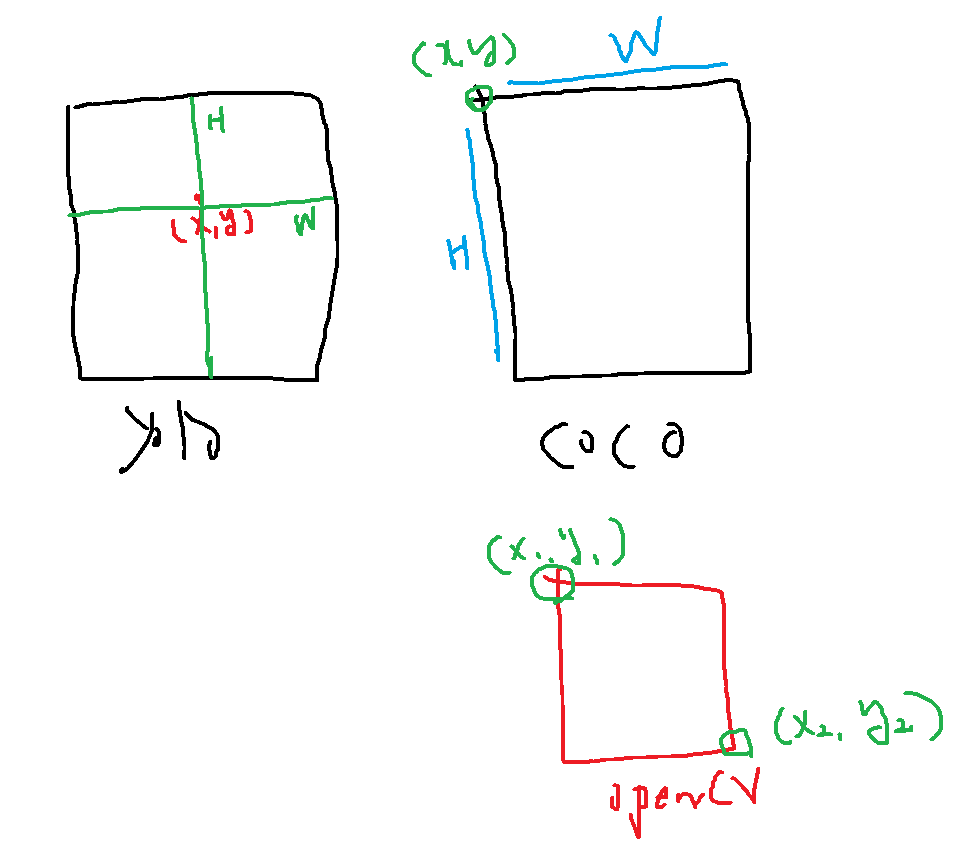

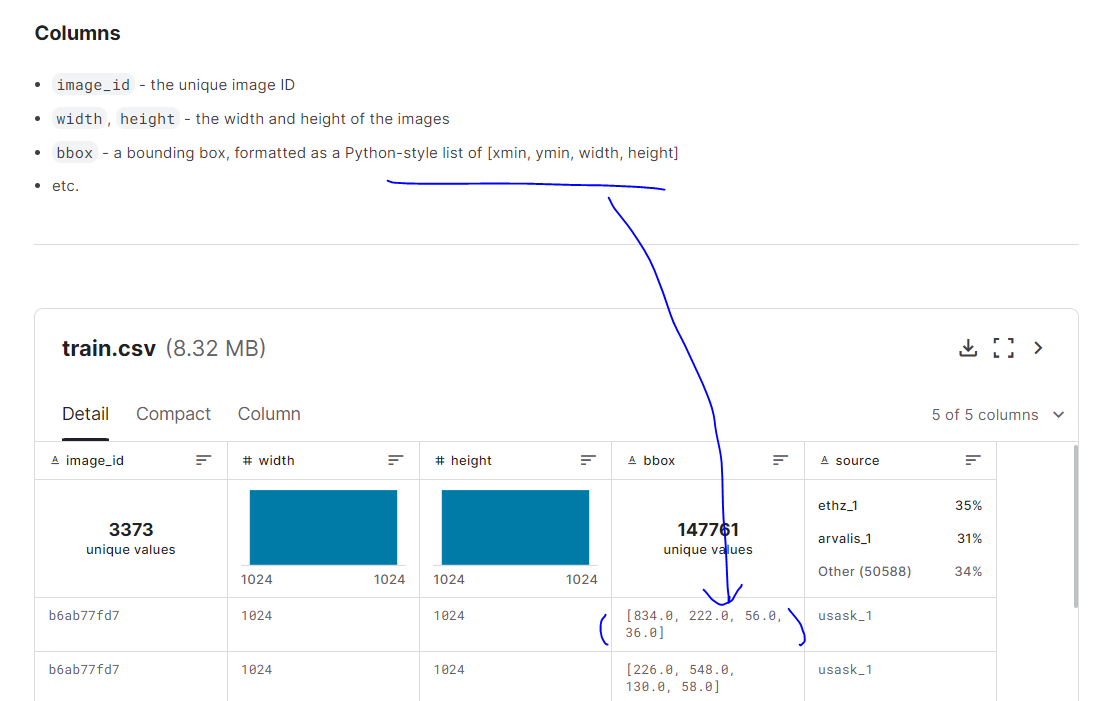

In [ ]:
# kaggleÏóê ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ Íµ¨Íµ¥ ÎìúÎùºÏù¥Î∏åÏóê ÏïïÏ∂ïÌï¥ÏÑú Ïò¨Î¶º!!!
!gdown 1iXn1p_bW4JO9qL3iSkXNFh7ngqs-gkhA

Downloading...
From (original): https://drive.google.com/uc?id=1iXn1p_bW4JO9qL3iSkXNFh7ngqs-gkhA
From (redirected): https://drive.google.com/uc?id=1iXn1p_bW4JO9qL3iSkXNFh7ngqs-gkhA&confirm=t&uuid=94cc9c02-2fde-41d4-8a29-7ef17bbfc68c
To: /content/global-wheat-detection.zip
100% 637M/637M [00:09<00:00, 64.4MB/s]


In [ ]:
# kaggle Îç∞Ïù¥ÌÑ∞ ÏïïÏ∂ï ÌååÏùº ÌíÄÍ∏∞
!unzip -qq "/content/global-wheat-detection.zip" -d "/content/data/"

In [ ]:
# Í∏∞Î≥∏Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨
# ==> Ï†ïÎãµ Î∞ïÏä§Îì§ÏùÄ csvÏóê Ï°¥Ïû¨ : pandas
# ==> trainÎßå ÏûàÍ≥†,, valÏù¥ ÏóÜÏùå..
# ==> datagenerator // scikit-learnÏùÑ ÏÇ¨Ïö©ÌïòÎäî train_test_split
import numpy as np
import pandas as pd
import os
from tqdm.auto import tqdm # Î∞òÎ≥µÎ¨∏ ÏÜçÏóêÏÑú ÏßÑÌñâ ÏÉÅÌÉú Î≥º Îïå ÏÇ¨Ïö©Ìå®ÌÇ§ÏßÄ
import shutil as sh
from sklearn.model_selection import StratifiedKFold

In [ ]:
# train Ï†ïÎ≥¥Îì§ÏùÑ ÌôïÏù∏..
df = pd.read_csv("/content/data/train.csv")
df.head()

image_id  width  height                         bbox   source
0  b6ab77fd7   1024    1024   [834.0, 222.0, 56.0, 36.0]  usask_1
1  b6ab77fd7   1024    1024  [226.0, 548.0, 130.0, 58.0]  usask_1
2  b6ab77fd7   1024    1024  [377.0, 504.0, 74.0, 160.0]  usask_1
3  b6ab77fd7   1024    1024  [834.0, 95.0, 109.0, 107.0]  usask_1
4  b6ab77fd7   1024    1024  [26.0, 144.0, 124.0, 117.0]  usask_1

In [ ]:
df.loc[0,"bbox"]

'[834.0, 222.0, 56.0, 36.0]'

In [ ]:
# ---> Î∞ïÏä§ Ï¢åÌëúÏóê ÎåÄÌïú Î¨∏ÏûêÏó¥ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÏùÑ ÌïòÎäîÍ≤å Ïú†Ïö©Ìï®
# + Ïù¥ÎØ∏ÏßÄ idÎäî Ïû†Ïãú Ï†úÏô∏ÌïòÍ≥† Í≤ΩÍ≥Ñ Ï†ïÎ≥¥Îßå Ï∂îÏ∂ú ÌïòÍ≤†Ïùå.
bboxs = np.stack(
    df.loc[:, "bbox"].apply(lambda x: np.fromstring(x[1:-1], sep=","))
)
bboxs

array([[834., 222.,  56.,  36.],
       [226., 548., 130.,  58.],
       [377., 504.,  74., 160.],
       ...,
       [134., 228., 141.,  71.],
       [430.,  13., 184.,  79.],
       [875., 740.,  94.,  61.]])

In [ ]:
# dfÏóêÏÑú yolo Ï§ëÏã¨Ïùò Ï¢åÌëúÍ∞íÏúºÎ°ú Î≥ÄÌôòÏùÑ ÌïòÎäîÍ≤å Î™©Ï†Å!!
# ==> Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Îäî cocoÎ∞©ÏãùÏúºÎ°ú Ï¢åÏ∏° ÏÉÅÎã®Ïù¥ Í∏∞Ï§Ä Ï¢åÌëú!!!!
# ==> Îã§ Ïà´ÏûêÎ°ú ÏùºÎã® Ï£ºÏñ¥ÏßÑ cocoÎ∞©ÏãùÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏπòÌôî!!!
for i , column in enumerate( ["x","y","w","h"]):
    df[column] = bboxs[:, i]
df.head()

image_id  width  height                         bbox   source      x  \
0  b6ab77fd7   1024    1024   [834.0, 222.0, 56.0, 36.0]  usask_1  834.0   
1  b6ab77fd7   1024    1024  [226.0, 548.0, 130.0, 58.0]  usask_1  226.0   
2  b6ab77fd7   1024    1024  [377.0, 504.0, 74.0, 160.0]  usask_1  377.0   
3  b6ab77fd7   1024    1024  [834.0, 95.0, 109.0, 107.0]  usask_1  834.0   
4  b6ab77fd7   1024    1024  [26.0, 144.0, 124.0, 117.0]  usask_1   26.0   

       y      w      h  
0  222.0   56.0   36.0  
1  548.0  130.0   58.0  
2  504.0   74.0  160.0  
3   95.0  109.0  107.0  
4  144.0  124.0  117.0

In [ ]:
df.drop( columns = ["bbox"], inplace=True)
df.head()

image_id  width  height   source      x      y      w      h
0  b6ab77fd7   1024    1024  usask_1  834.0  222.0   56.0   36.0
1  b6ab77fd7   1024    1024  usask_1  226.0  548.0  130.0   58.0
2  b6ab77fd7   1024    1024  usask_1  377.0  504.0   74.0  160.0
3  b6ab77fd7   1024    1024  usask_1  834.0   95.0  109.0  107.0
4  b6ab77fd7   1024    1024  usask_1   26.0  144.0  124.0  117.0

In [ ]:
# yoloÍ∞Ä ÌïôÏäµÏùÑ ÏúÑÌï¥ÏÑú ÌïÑÏöîÌïú Ï§ëÏã¨ Ï¢åÌëúÎ°ú Î≥ÄÌôò
# => W/HÎäî Í∑∏ÎåÄÎ°ú Ïú†ÏßÄÍ∞Ä ÎêòÏñ¥ÏÑú Îî∞Î°ú ÌååÏÉù ÏïàÌï¥ÎèÑ Îê®
df["x_center"] = df["x"] + df["w"]/2
df["y_center"] = df["y"] + df["h"]/2
# + yolo3ÏùÑ Ïû¨ÌïôÏäµÏùÑ ÏãúÏºúÏïº Ìï®!!!!
#      coco.names---> ÌïôÏäµÌï† ÎåÄÏÉÅÏùò Ïù¥Î¶Ñ!!!!
#      Î≤º : ÏÉàÎ°úÏö¥ ÌÅ¥ÎûòÏä§/Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò Ï†ïÎ≥¥Î•º Î∂ÄÏó¨!!!!
df["classes"] = 0 # yaml Î°ú ÌïôÏäµÏùÑ Ìï† ÎåÄÏÉÅÏóê ÎåÄÌïú ÏÑ∏ÌåÖÏóêÏÑú Î¨∏Ï†úÍ∞Ä Îê®
# + ÎÇ¥Í∞Ä Îçî Ï¢ÖÎ≥ÑÎ°ú ÌïòÍ≤†Îã§Î©¥, Ï¢ÖÎ≥ÑÎ°ú ÌÅ¥ÎûòÏä§Îì§ÏùÑ ÌïòÏãúÎ©¥ Îê®
df.head()

image_id  width  height   source      x      y      w      h  fold  \
0  b6ab77fd7   1024    1024  usask_1  834.0  222.0   56.0   36.0   1.0   
1  b6ab77fd7   1024    1024  usask_1  226.0  548.0  130.0   58.0   4.0   
2  b6ab77fd7   1024    1024  usask_1  377.0  504.0   74.0  160.0   3.0   
3  b6ab77fd7   1024    1024  usask_1  834.0   95.0  109.0  107.0   2.0   
4  b6ab77fd7   1024    1024  usask_1   26.0  144.0  124.0  117.0   2.0   

   x_center  y_center  classes  
0     862.0     240.0        0  
1     291.0     577.0        0  
2     414.0     584.0        0  
3     888.5     148.5        0  
4      88.0     202.5        0

In [ ]:
# train/val Î∂ÑÎ¶¨
# yolo v3Î°ú ÏúÑÏùò Î≤º Îç∞Ïù¥ÌÑ∞Î•º ÌïôÏäµÏãúÌÇ§Í∏∞ ÏúÑÌïú ÌôòÍ≤ΩÏÑ§Ï†ï ÌååÏùº ÏÉùÏÑ±
# yolo v3 train.pyÎ•º ÌôúÏö©Ìï¥ÏÑú Ïã§Ìñâ
# testÏóêÏÑú yolo3 Í∏∞Î∞òÏúºÎ°ú Î≤º Ïù¥ÏÇ≠ Î∞ïÏä§ Ï∞æÎäî Î™®Îç∏ÏùÑ Ï†ÅÏö©
# kaggleÏóê ÏóÖÎ°úÎìúÏö© ÌååÏùº Ïä§ÌÉÄÏùºÏóê ÎßûÏ∂∞ÏÑú ÏÉùÏÑ±Ìï¥ÏÑú ÏóÖÎ°úÎìú!

In [ ]:
# Í∏∞Ï°¥ Ï¢ãÏùÄ Î™®Îç∏ÏùÑ Í∏∞Î≥∏ÏúºÎ°ú Ìï¥ÏÑú
# ÎÇ¥ Î™©Ï†ÅÏóê ÎßûÎäî Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌïú Ïû¨ÌïôÏäµ
# ==> Fine TunningÏùÑ ÌïòÎ†§Í≥† Ìï®


In [ ]:
# yolo Ïù¥ÎØ∏ÏßÄ : Ìè¥Îçî Íµ¨Ï°∞Î•º ÏÑ∏ÌåÖÏùÑ Ìï¥Ïïº Ìï®!!!!!!
# ÌïôÏäµÏö© Ìè¥Îçî ( Ïù¥ÎØ∏ÏßÄ Î∂ÑÎ•ò : train Ìè¥Îçî ÏïÑÎûòÏóê ÌïòÏúÑ Ìè¥ÎçîÎ°ú ÏßÄÏ†ïÌïòÎ©¥ Ï≤òÎ¶¨)
#    ===> dog breed Î∂ÑÎ•ò ÏÑ∏ÌåÖÍ≥º ÎèôÏùºÌï®!!!!
#     - train
#     - valid
#     - test

In [ ]:
# ÏãúÍ∞ÑÏÉÅ ÏùºÎ∂ÄÎßå ÌïôÏäµÌïòÎèÑÎ°ù ÌïòÍ≤†Ïùå
# -> Ïù¥ Î∂ÄÎ∂ÑÏùÄ Îã®Ïàú Îç∞Ïù¥ÌÑ∞ Ï°∞Ï†àÏö©ÏúºÎ°ú ÏÇ¨Ïö©Ìïú Í≤ÉÏù¥ÎØÄÎ°ú Ï†ÑÏ≤¥ÌïôÏäµÏù¥ ÏïÑÎãò!

In [ ]:
df.shape

(147793, 8)

In [ ]:
fold_id = np.zeros( (df.shape[0],  1) )
fold_id.shape

(147793, 1)

In [ ]:
skf = StratifiedKFold( n_splits = 5,
                      random_state=1234,
                       shuffle=True)
# ---> Ïù¥ Î∂ÄÎ∂ÑÏùÑ Î∞îÌÉïÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ ÏÖãÏùÑ Î∂ÑÎ¶¨ ÏûëÏóÖÏùÑ ÌïòÎ†§Í≥† Ìï®!!

In [ ]:
df["source"].value_counts()

source
ethz_1       51489
arvalis_1    45716
rres_1       20236
arvalis_3    16665
usask_1       5807
arvalis_2     4179
inrae_1       3701
Name: count, dtype: int64

In [ ]:
# ==> train Îç∞Ïù¥ÌÑ∞ ÏÖãÏóê ÏûàÏñ¥ÏÑú sourceÏóê ÎåÄÌï¥ÏÑú ÎπÑÏú®ÏùÑ Ïú†ÏßÄÌïòÎ©¥ÏÑú ÌïôÏäµ ÏÖãÏùÑ Î∂ÑÎ¶¨
for (num, (train_index, test_index) ) in enumerate( skf.split(df, df["source"])):
    fold_id[ test_index] = int(num)
df["fold"] = fold_id.copy()
df.head()

image_id  width  height   source      x      y      w      h  fold
0  b6ab77fd7   1024    1024  usask_1  834.0  222.0   56.0   36.0   1.0
1  b6ab77fd7   1024    1024  usask_1  226.0  548.0  130.0   58.0   4.0
2  b6ab77fd7   1024    1024  usask_1  377.0  504.0   74.0  160.0   3.0
3  b6ab77fd7   1024    1024  usask_1  834.0   95.0  109.0  107.0   2.0
4  b6ab77fd7   1024    1024  usask_1   26.0  144.0  124.0  117.0   2.0

In [ ]:
#gridsearch( model, cv=stf ) # ÏÖã Íµ¨ÏÑ±Ïóê ÎåÄÌïú ÎÇ¥Ïö©

In [ ]:
df["fold"].value_counts()

fold
1.0    29559
2.0    29559
0.0    29559
4.0    29558
3.0    29558
Name: count, dtype: int64

In [ ]:
df.head()

image_id  width  height   source      x      y      w      h  fold
0  b6ab77fd7   1024    1024  usask_1  834.0  222.0   56.0   36.0   1.0
1  b6ab77fd7   1024    1024  usask_1  226.0  548.0  130.0   58.0   4.0
2  b6ab77fd7   1024    1024  usask_1  377.0  504.0   74.0  160.0   3.0
3  b6ab77fd7   1024    1024  usask_1  834.0   95.0  109.0  107.0   2.0
4  b6ab77fd7   1024    1024  usask_1   26.0  144.0  124.0  117.0   2.0

In [ ]:
# ===> ÌïÑÏöîÌïú Ï†ïÎ≥¥Îì§Îßå Í∞ÄÏßÄÍ≥† Ïû¨ Íµ¨ÏÑ±ÏùÑ ÌïòÎ©¥ Îê®
# ===> ÌïÑÏöîÌïú Ï†ïÎ≥¥Îì§Îßå Í∞ÄÏßÄÍ≥† Íµ¨ÏÑ±ÏùÑ ÌïòÏûê
# Ï∞∏Í≥†) sourceÎäî Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ÏóêÎßå ÏÇ¨Ïö©ÏùÑ ÌñàÍ≥†,Í∑∏ÎûòÏÑú Îçî ÌïÑÏöî ÏóÜÏñ¥ÏÑú ÏÉùÎûµ
# Ï∞∏Í≥†) classesÎäî Ïó¨Îü¨Í∞ÄÏßÄÎ•º Ìï¥ÏïºÌïúÎã§Î©¥,Îã§Î•∏ ÎùºÎ≤® Ïù∏ÏΩîÎî© Í∞íÏúºÎ°ú ÏßÄÏ†ï!!!!
#       ÏßÄÍ∏àÏùÄ 0Î≤àÏúºÎ°ú 1Í∞ú ÎåÄÏÉÅÎßå ÌñàÏùå!!
df = df.loc[:, ["image_id", "x","y","w","h", "x_center", "y_center", "classes","fold"]]
df.head()

image_id      x      y      w      h  x_center  y_center  classes  fold
0  b6ab77fd7  834.0  222.0   56.0   36.0     862.0     240.0        0   1.0
1  b6ab77fd7  226.0  548.0  130.0   58.0     291.0     577.0        0   4.0
2  b6ab77fd7  377.0  504.0   74.0  160.0     414.0     584.0        0   3.0
3  b6ab77fd7  834.0   95.0  109.0  107.0     888.5     148.5        0   2.0
4  b6ab77fd7   26.0  144.0  124.0  117.0      88.0     202.5        0   2.0

In [ ]:
# YoloÎ°ú ÌïôÏäµÏùÑ ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ìè¥Îçî Íµ¨Ï°∞Î°ú ÏÑ∏ÌåÖÏùÑ Ìï¥Ïïº Ìï®
source ="train"

# ÏãúÍ∞Ñ Í¥ÄÍ≥ÑÏÉÅ Ï§ÑÏó¨ÏÑú ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏúÑÏùò ÏÖã Ï§ëÏóêÏÑú 0Î≤àÎßå ÏÑ†ÌÉùÌï¥ÏÑú ÌïòÍ≤†ÏäµÎãàÎã§
fold = 0
val_index = list( df[df["fold"]==fold]["image_id"])
print(val_index)

['b6ab77fd7', 'b6ab77fd7', 'b6ab77fd7', 'b6ab77fd7', 'b6ab77fd7', 'b6ab77fd7', 'b6ab77fd7', 'b6ab77fd7', 'b53afdf5c', 'b53afdf5c', 'b53afdf5c', 'b53afdf5c', 'b53afdf5c', 'b53afdf5c', 'b53afdf5c', 'b53afdf5c', 'b53afdf5c', 'b53afdf5c', 'b53afdf5c', 'b53afdf5c', 'b53afdf5c', 'b53afdf5c', '7b72ea0fb', '7b72ea0fb', '7b72ea0fb', '7b72ea0fb', '7b72ea0fb', '91c9d9c38', '91c9d9c38', '91c9d9c38', '91c9d9c38', '91c9d9c38', '41c0123cc', '41c0123cc', '41c0123cc', '41c0123cc', '41c0123cc', 'c682d8c66', 'c682d8c66', 'c682d8c66', 'c682d8c66', 'c682d8c66', 'e46378032', 'e46378032', 'e46378032', 'e46378032', 'e46378032', 'e46378032', '71fd03d51', '71fd03d51', '71fd03d51', '71fd03d51', '71fd03d51', '71fd03d51', '83a5d8ac8', '83a5d8ac8', '83a5d8ac8', '83a5d8ac8', '83a5d8ac8', '02b6f199c', '02b6f199c', '02b6f199c', '02b6f199c', '02b6f199c', '02b6f199c', '02b6f199c', '1bda74f14', '1bda74f14', '1bda74f14', '3e1e66c76', '3e1e66c76', '3e1e66c76', '3e1e66c76', '3e1e66c76', '3e1e66c76', '3e1e66c76', '4a3f67d2e'

In [ ]:
len(val_index)

29559

In [ ]:
# Ïù¥ÎØ∏ÏßÄ ÌååÏùº Ïù¥Îèô
# ÏÖãÏùÄ 1Ïû•Ïùò Ïù¥ÎØ∏ÏßÄÏóê Ïó¨Îü¨Í∞úÏùò Î≤º Ïù¥ÏÇ≠Ïùò Î∞ïÏä§Í∞Ä Ï°¥Ïû¨!!!
#      Ïù¥ÎØ∏ÏßÄ idÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ìè¥Îçî Íµ¨Ï°∞Ïö© ÌååÏùº Ï≤òÎ¶¨..
for name, name_data in tqdm(df.groupby("image_id")):
    # name : Ïù¥ÎØ∏ÏßÄ
    # name_data : ÏúÑÏùò Ï†ïÎ≥¥Îì§..
    if name in val_index:
        save_path = "valid/"
    else:
        save_path ="train/"

    # Ìè¥Îçî Íµ¨Ï°∞Î•º ÏÉùÏÑ±
    if not os.path.exists("convertor/fold{}/labels/".format(fold)+save_path):
        os.makedirs("convertor/fold{}/labels/".format(fold)+save_path)
    # Í¥ÄÎ†®Îêú ÌååÏùºÏùÑ yolo ÌïôÏäµÏùÑ ÏúÑÌï¥ÏÑú ÏÉùÏÑ±...
    with open("convertor/fold{}/labels/".format(fold)+save_path+name+".txt","w+" ) as f:
        # Ïù¥ÎØ∏ÏßÄ Î≥ÑÎ°ú Í¥ÄÎ†® Ï†ïÎ≥¥ txt ÌååÏùº ÏÉùÏÑ±..
        # ==> yolo3 Í∏∞Ï§ÄÏúºÎ°ú Ï¢åÌëúÎì§ÏùÑ ÏÉÅÎåÄÏ¢åÌëú.......ÏÉÅÎåÄÏ¢åÌëú Î∞ÄÏñ¥ÎÑ£Ïñ¥Ï§òÏïº Ìï®..
        row = name_data[ [ "classes", "x_center", "y_center","w","h"]].astype(float).values
        row = row / 1024 # yolo Ïùò ÏûÖÎ†• Ï¢åÌëúÎì§ÏùÑ ÏÉÅÎåÄÏ¢åÌëúÌôî...1024 Ïù¥ Îç∞Ïù¥ÌÑ∞Îäî ÏùºÍ¥ÑÎåÄÍ≤å 1024
        # ==> ÏàòÏßëÌïú Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Í∞Ä Îã§Î•¥Î©¥,,,Í∞ÅÍ∏∞ ÌÅ¨Í∏∞ Î≥ÑÎ°ú ÏÉÅÎåÄ Ï¢åÌëúÌôî Ìï¥ÏïºÌï®...
        # Ï∞∏Í≥†) Ïù¥ÎØ∏ÏßÄ Î≥ÑÎ°ú ÌÅ¨Í∏∞Í∞Ä Îã§ÏñëÌï† ÎïåÎäî Ïã†Í≤ΩÏç®ÏÑú Ìï¥Ïïº Ìï®...
        row = row.astype( str) # text ÌååÏùºÏóê ÏûëÏÑ±ÏùÑ ÏúÑÌï¥ÏÑú Î™ÖÌôïÌïòÍ≤å Î¨∏ÏûêÏó¥Ìôî..Ïà´ÏûêÎ•º.
        for j in range( len(row)):
            # 1Í∞ú Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏóê ÏûàÎäî Í∞úÎ≥Ñ Î∞ïÏä§Ïóê ÎåÄÌïú Ï†ïÎ≥¥Îì§ÏùÑ Ï≠â....
            text = " ".join(row[j])
            f.write(text)
            f.write("\n")
    # Ïã§Ï†ú ÌïôÏäµÏùÑ ÏúÑÌïú Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ Ìè¥ÎçîÍµ¨Ï°∞Î°ú Î≥µÏÇ¨Î•º Ìï¥Îë¨Ïïº Ìï®!!!
    if not os.path.exists("convertor/fold{}/images/{}".format(fold,save_path)):
        os.makedirs("convertor/fold{}/images/{}".format(fold,save_path ))
    sh.copy( "/content/data/{}/{}.jpg".format(source,name ) ,
             "convertor/fold{}/images/{}/{}.jpg".format(fold, save_path,name ))
    # ---> convertor/fold0/images/train/~~~/jpg
    #      convertor/fold0/images/valid/~~~/jpg

  0%|          | 0/3373 [00:00<?, ?it/s]

In [ ]:
# Í∑∏ Îã§ÏùåÏóê yolo Ïóê ÎåÄÌïú ÏΩîÎìúÎì§ÏùÑ Í∞ÄÏßÄÍ≥† ÏôÄÏïº Ìï®!!!
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17080, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 17080 (delta 21), reused 7 (delta 7), pack-reused 17050 (from 3)
Receiving objects: 100% (17080/17080), 15.69 MiB | 19.31 MiB/s, done.
Resolving deltas: 100% (11726/11726), done.


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 904.4/904.4 kB 48.0 MB/s eta 0:00:00


In [ ]:
# !git clone https://github.com/ultralytics/yolov5  && cd yolov5 && pip install -r requirements.txt

In [ ]:
# Í∏∞Ï°¥Ïùò cocoÏÖãÏù¥ ÏïÑÎãå ÏõêÌïòÎäî Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ ÏßÑÌñâ
# ÌïôÏäµÏùÑ ÏúÑÌïú yaml ÌååÏùº ÏßÅÏ†ë ÏûëÏÑ±(json)
# Ï∞∏Í≥†) Îã§Î•∏ ÏÇ¨ÎûåÎì§ÎèÑ ÌôòÍ≤ΩÏÑ§Ï†ï, Î™®Îç∏ ÏÑ§Ï†ïÎì§ÏùÑ yaml ÌååÏùºÎ°ú ÏûëÏÑ±ÌïòÎäî Í≤ΩÏö∞Îì§Ïù¥ ÏûàÏùå.

# Í∏∞Î°ùÌï† Ï†ïÎ≥¥
# 1) train Ìè¥ÎçîÏùò ÏúÑÏπò : train
# 2) valid Ìè¥ÎçîÏùò ÏúÑÏπò : val
# 3) txt ÌååÏùºÏóê ÎåÄÌïú Ï†ÅÏÑ±Ìïú Ï¢ÖÎ•ò Ïàò : nc (Îã®, ÏßÄÍ∏àÏùÄ Î≤ºÏù¥ÏÇ≠)
# 4) names Ïóê Íµ¨Ï≤¥Ï†ÅÏù∏ ÎåÄÏÉÅÏùò Ïù¥Î¶Ñ ÏàúÏÑúÎåÄÎ°ú : names
# ==> yamlÌååÏùºÎ°ú ÏûëÏÑ±

In [ ]:
# ÏûëÏÑ±Î∞©Î≤ï1) ÏßÅÏ†ë txtÌååÏùº Ïó¥Ïñ¥ÏÑú(Î©îÎ™®Ïû•) ÏûëÏÑ±,
# ÏûëÏÑ±Î∞©Î≤ï2) ÏΩîÎìúÎ°ú ÏûëÏÑ± ***
# ==> Ï£ºÏùòÏÇ¨Ìï≠!!!!!
# Ìï≠Î™© Îã§ÏùåÏóê Î¨¥Ï°∞Í±¥ Ìïú Ïπ∏ Í≥µÎ∞±!! **** ÏóêÎü¨ Î∞úÏÉù ÏöîÏù∏ ****
# ==> ÏñëÏãù/Í≥µÎ∞±/: ÏúÑÏπòÎì±ÏùÄ Ï†ïÌôïÌïòÍ≤å ÎßûÏ∂∞ÏÑú Ìï¥Ïïº Ìï®!!! : Îã§ÏùåÏóê Î¨¥Ï°∞Í±¥ Ìïú Ïπ∏ Í≥µÎ∞±!!!
yaml_text = """train: /content/convertor/fold0/images/train/
val: /content/convertor/fold0/images/valid/

nc: 1
names: ['wheat']
"""

In [ ]:
with open("wheat.yaml", "w") as f:
    f.write(yaml_text)

In [ ]:
# Ïã§Ï†ú ÏûëÏÑ±Ìïú ÌååÏùºÏùÑ ÌôïÏù∏ÏùÑ ÌïòÎ©¥
# 1) colab ÌååÏùºÏùÑ ÏßÅÏ†ë ÌÅ¥Î¶≠
# 2) Î™ÖÎ†πÏñ¥Î°ú ÌôïÏù∏
!cat wheat.yaml

train: /content/convertor/fold0/images/train/
val: /content/convertor/fold0/images/valid/

nc: 1
names: ['wheat']


In [ ]:
#####=====> Ï§ÄÎπÑ ÏÑ∏ÌåÖ ÎÅù!

In [ ]:
# train.pyÎ•º Ìï† Îïå ÌïÑÏöîÌïú ÏÑ∏ÌåÖÎì§ Î™á Í∞ÄÏßÄÎßå
# 1. train.pyÎ•º ÏÇ¨Ïö©ÏùÑ ÌïòÎ†§Í≥† Ìï®.
# ==> Í∑∏ÎÉ• yolo5 Í∏∞Ï°¥ ÌïôÏäµ pre-trained weight Í∞íÏúºÎ°ú ÏãúÏûë
# 2. --img 512 : ÏõêÎ≥∏Ïùò Ïù¥ÎØ∏ÏßÄÎ•º 512Î°ú Ï§ÑÏó¨ÏÑú ÌïôÏäµÏùÑ Ìï®.(ÏÜçÎèÑÎïåÎ¨∏Ïóê)
# 3. --batch /-- epoch
# 4. --data : ÎÇ¥Í∞Ä ÌïôÏäµÏãúÌÇ§Í≥†ÏûêÌïòÎäî ÎåÄÏÉÅÏóê ÎåÄÌïú Ï†ïÎ≥¥ yamlÌååÏùº
#           wheat.yaml ÏßÄÏ†ïÏùÑ ÌïòÎ©¥ Îê®
# 5. --names

In [ ]:
!python ./yolov5/train.py --img 512 --batch 2 --epochs 3 --workers 2 --data wheat.yaml --weights yolov5s.pt --name yolov5s_fold0

wandb: WARNING ‚ö†Ô∏è wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-31 19:33:36.114042: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-31 19:33:36.156932: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-31 19:33:36.169090: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't v

In [ ]:
# ÏÑ§Î™ÖÏùò ÏöîÏßÄ
# yolo Î≤îÏö©Ï†ÅÏù∏ Î™®Îç∏ÏùÑ ÌôúÏö©Ìï¥ÏÑú ÎÇòÏùò Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÌïôÏäµÏùÑ ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ïó¨Îü¨ ÏÑ∏ÌåÖÏù¥ ÌïÑÏöî
# 1) Ï¢åÌëúÏóê ÎåÄÌïú Ï†ïÎ≥¥ Ï≤òÎ¶¨
# 2) Ìè¥Îçî Íµ¨Ï°∞ + Í∞Å ÎåÄÏÉÅÎ≥ÑÎ°ú ÌïôÏäµ Ï†ïÎ≥¥ txtÌååÏùº.(Íµ¨Ï≤¥Ï†Å)
# 3) ÌïôÏäµÏùÑ Ìï† yaml ÏùÑ ÏûëÏÑ±(ÌÅ∞ Ï†ïÎ≥¥)
# ===> Ïù¥ Ï§ëÏóêÏÑú ÌïòÎÇòÎùºÎèÑ ÌãÄÏñ¥ÏßÄÎ©¥ Ïïà ÎèåÏïÑ Í∞ê;;;
# ===> yaml ÏÉùÏÑ± Ï§ëÏóêÏÑú Í≥µÎ∞±Ï≤òÎ¶¨Î∂ÄÎ∂ÑÏóê Ïú†Ïùò!!!!! (ÏóêÎü¨ ÌååÏïÖÏù¥ Ïñ¥Î†§ÏõÄ..)

In [ ]:
# ÌïôÏäµÏù¥ ÏõêÌïòÎäîÎåÄÎ°ú ÎêòÏóàÎã§Î©¥ ---> Ï†ÅÏö©!!!!
# ÌïôÏäµ : train.py
# Ï†ÅÏö© : detect.py

# conf : Ïú†ÏùòÏàòÏ§Ä
# img  : Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨Ìï† ÏÇ¨Ïù¥Ï¶à 512
# source : ÌÖåÏä§Ìä∏Ìï† Ïù¥ÎØ∏ÏßÄÎì§Ïù¥ ÏûàÎäî Í≤ΩÎ°ú
# weight :

In [ ]:
!python ./yolov5/detect.py --weights ./yolov5/runs/train/yolov5s_fold0/weights/best.pt --conf 0.1 --img 512 --source ./data/test --save-txt --save-conf

In [ ]:
# Ïã§ÌñâÏùÑ ÌïòÎ©¥
# Ï£ºÎ°ú yolo Ìè¥Îçî ÎÇ¥Ïùò runÌïòÏúÑ Ìè¥Îçî ÎÇ¥Ïóê ÏÉùÏÑ±Ïù¥ Îê®...
# ==>yolov5/runs/detect/exp2/labelsÏïàÏóê txt ÌååÏùºÎ°ú Ïù¥ÎØ∏ÏßÄÎ≥ÑÎ°ú Í≤∞Í≥º box
# ==> yolov5/runs/detect/exp2/ Í≤ÄÏ∂úÎêú Î∞ïÏä§Îì§Ïùò Ïù¥ÎØ∏ÏßÄÎì§Ïù¥...

In [ ]:
# /content/yolov5/runs/detect/exp2/labels/2fd875eaa.txt
# 0 0.881836 0.578613 0.236328 0.243164 0.116971
# ==> 6Í∞úÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º ÎçòÏ†∏ Ï§å!! yolo
# Ï≤òÏùå : Í∑∏ Ïù¥ÎØ∏ÏßÄÏóêÏÑú Í≤ÄÏ∂úÌïú ÎåÄÏÉÅ
# 2Î≤àÏß∏ : Ï≤òÎ¶¨Îêú ÎπÑÏú®Ïóê ÎåÄÌïú
# 3~6Î≤àÏß∏ : x,y,w,hÏàúÏÑúÎåÄÎ°ú Ï†ïÎ≥¥Îã§ Îì§Ïñ¥ ÏûàÏùå.
# =========> ÎπÑÏú®Í∞íÏùÑ ( ÏÉÅÎåÄÏ†ÅÏù∏ Í∞í )
# =========> ÌîΩÏÖÄÎ°ú ÌôòÏùÑ Ìï¥Ïïº ÌïòÎäî Îòê Í∑ÄÏ∞ÆÏùÄ ÏûëÏóÖÏù¥ ÏûàÏùå!!!

In [ ]:
### yoloÍ∞Ä ÌïôÏäµÌïú Í≤∞Í≥º(ÏÉÅÎåÄÏ¢åÌëú) Ï§ëÏã¨ x,yÏùÑ
# === Ï†àÎåÄÏ¢åÌëú(1024)& Í∏∞Ï§ÄÏ¢åÌëú(x,y)--> Ï¢åÏ∏°ÏÉÅÎã® Ï¢åÌëú(x,y)
def convt_yo_kaggle( yolo_pos):
    x = int( 1024 * (yolo_pos[1]-yolo_pos[3]/2 ) ) # ÎπÑÏú® & Í≥ÑÏÇ∞(Ï¢åÏ∏° ÏÉÅÎã®ÏúºÎ°ú Ïù¥Îèô)
    y = int( 1024 * (yolo_pos[2] - yolo_pos[4]/2) ) # ÎπÑÏú® & Í≥ÑÏÇ∞(Ï¢åÏ∏° ÏÉÅÎã®ÏúºÎ°ú Ïù¥Îèô)
    w = int( 1024 * yolo_pos[3]) # ÎπÑÏú®Îßå
    h = int( 1024 * yolo_pos[4]) # ÎπÑÏú®Îßå
    return ( str(x)+","+str(y)+","+str(w)+","+str(h))
# ==> Ïù¥ÎØ∏ÏßÄ ÌîΩÏÖÄ Ï§ëÏã¨ÏúºÎ°ú Í∞íÏùÑ Ï§òÏïº ÌïòÍ∏∞Ïóê intÎ°ú ÌòïÏùÑ Î≥ÄÌôòÏùÑ Ìï®
# ==> 1~2 ÌîΩÏÖÄÏùÄ Î∞ÄÎ¶¨Í±∞ÎÇò Ïò§Ï∞®Í∞Ä Î∞úÏÉùÌï®!!!!!

In [ ]:
# ===> ÎÇ¥Í∞Ä Ï≤òÎ¶¨Ìïú Î™®Îç∏Îì§Ïù¥/ ÌïôÏäµ Í≤∞Í≥ºÎì§Ïù¥
#      Ïñ¥Îñ§ Ï†ïÎ≥¥/Í∏∞Ï§ÄÎì§Î°ú Í∞íÎì§ÏùÑ Ï£ºÎäîÏßÄ Íº≠ Ï≤¥ÌÅ¨
# ===> Ï¢ÖÏ¢Ö Î≥ÄÌôòÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº ÌïòÎäî Í≤ΩÏö∞Í∞Ä ÏûàÏùå

In [ ]:
import os
import pandas as pd

In [ ]:
# KaggleÏóê ÎßûÎèÑÎ°ù Îã§Ïãú Ï†úÏ∂úÏö©
# ==> sample_submission.csv
with open("my_sub.csv", "w") as mf:
    # testÌïú Í≤∞Í≥ºÎì§Ïóê ÎåÄÌïú txt ÌååÏùºÏóê ÏûàÎäî Ï¢åÌëú
    result_folder = "./yolov5/runs/detect/exp2/labels/"
    for f in os.listdir(result_folder):
        file_name = result_folder + f
        data = pd.read_csv(file_name, sep=" ", header=None)
        temp_box = ",".join( list(data.apply(lambda x: convt_yo_kaggle(x), axis=1 ) ) )
        mf.write(f+temp_box+"\n")
mf.close()

In [ ]:
##### kaggleÏóêÏÑú Í∏∞Ï°¥ Î™®Îç∏ÏùÑ Í∞ÄÏßÄÍ≥† kaggleÏùò Î¨∏Ï†úÎ•º Ìë∏Îäî Î∞©Ïãù Ï§ë ÌïòÎÇò ####
# level 0 : Í∞ÄÏû• Í∏∞Î≥∏Ï†ÅÏù∏ Íµ¨Ï°∞
# ==> yolo ÌòïÏãù& ÏûëÏÑ±Ìï† ÌååÏùº
# ==> Ï¢åÌëúÍ∞íÏóê ÎåÄÌïú Ï≤òÎ¶¨
# (Ï≤òÏùå ÌïòÏã† Î∂ÑÎì§ÏùÄ Î®∏Î¶¨ÏóêÏÑú ÌòºÎèôÏù¥ Îèî!!!!)
# --> ÏΩîÎìúÌôî ÏûëÏóÖÎèÑ Ìï¥ÏïºÌï®
# ++++
# kaggleÏóê Ï†úÏ∂úÏö©ÏúºÎ°ú Îã§Ïãú Ï†ïÎ¶¨Ìï¥ÏÑú ÏóÖÎ°úÎìúÌïòÎäî Í≤ÉÎèÑ ÌïÑÏöî